In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import losses, metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(f"type(x_train)    : {type(x_train)}")
print(f"x_train.shape    : {x_train.shape}")

type(x_train)    : <class 'numpy.ndarray'>
x_train.shape    : (25000, 10000)


In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-16 00:00:05.064076: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-16 00:00:05.064225: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

2022-05-16 00:00:06.007430: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-16 00:00:06.007655: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-05-16 00:00:06.239389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4997 - binary_accuracy: 0.7470

2022-05-16 00:00:07.452201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 39ms/step - loss: 0.4997 - binary_accuracy: 0.7470 - val_loss: 0.3376 - val_binary_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2645 - binary_accuracy: 0.9001 - val_loss: 0.2839 - val_binary_accuracy: 0.8873
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1923 - binary_accuracy: 0.9295 - val_loss: 0.2844 - val_binary_accuracy: 0.8865
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1324 - binary_accuracy: 0.9531 - val_loss: 0.3134 - val_binary_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1287 - binary_accuracy: 0.9535 - val_loss: 0.3161 - val_binary_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0737 - binary_accuracy: 0.9775 - val_loss: 0.3475 - val_binary_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0669 -

history dict: dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


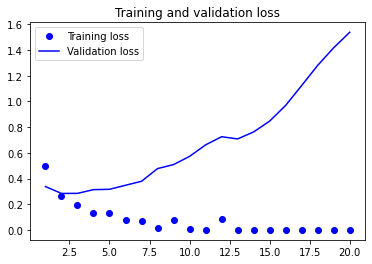

In [10]:
history_dict = history.history
print(f"history dict: {history_dict.keys()}")

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

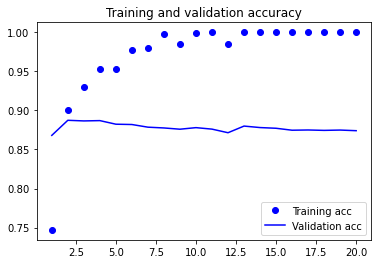

In [11]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [12]:
results = model.evaluate(x_test, y_test)
print(f"test loss, test accuracy : {results}")

782/782 [==============================] - 4s 5ms/step - loss: 1.6731 - binary_accuracy: 0.8586
test loss, test accuracy : [1.6730694770812988, 0.8586400747299194]
